In [8]:
import keras
import scipy

from keras.utils.generic_utils import CustomObjectScope
from keras.layers import DepthwiseConv2D, ReLU

car_images_directory = '/Users/az01640/Projets/car-detection/data/processed/FR/Bordeaux'
data_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)
data_generator = data_generator.flow_from_directory(car_images_directory, target_size=(224, 224), batch_size=32)

Found 92 images belonging to 1 classes.


In [9]:
model_directory ='../models/mobileNet/mobileNet_mobile_net.35-0.72.hdf5'

with CustomObjectScope({'ReLU': ReLU, 'DepthwiseConv2D': DepthwiseConv2D}):
    model = keras.models.load_model(model_directory)
    
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

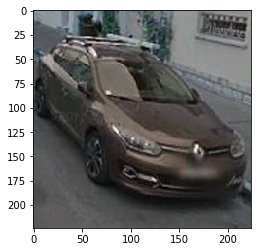

In [14]:
import matplotlib.pyplot as plt

%matplotlib inline
import cv2
import numpy as np

img = cv2.imread('../data/processed/FR/Bordeaux/images/205bf138-584e-47bf-8344-2f4d8b451506.jpg')
res = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
plt.imshow(res)
res = res[np.newaxis]

In [15]:
data_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)
predictions = model.predict(data_generator.flow(res).next(), steps=1)

In [16]:
[np.argmax(pred) for pred in predictions]

[2]